# Viewership Insights for an anime video streaming company

In this Jupyter Notebook I will go through an example of some data analysis that could be done as part of a Business Intelligence team. The graphs below are an example of a possible viewership reporting presentation that can be used to guide strategic decisions. In order to highlight techniques of deep diving analysis rather than data cleansing, I have created my own dummy dataset for anime industry specific viewership data. I will try to make the exercise as real as possible by tying the insights to real world scenarios.

In [240]:
# Importing the packages we will need for the Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [241]:
# Reading in the excel file containing the dummy data that I have used 
df = pd.read_excel(r'C:\Users\qays\Documents\Code\Crunchyroll\Viewership Dataset2.xlsx',sheet_name='fact_transaction')

In [242]:
df

,transaction id,customer id,content id,show length,mins watched,country,device id/type,Date,show completed (watch to the end of episode),proportion watched,episode No watched / episode ID,genre,Customer Age,month,gender
0,1,823,22,106,100.972857,Philipines,NaN,2021-01-16,1,9.525741e-01,NaN,isekai,26,1,male
1,2,1068,41,26,0.000160,Jamaica,NaN,2021-01-16,0,3.059022e-07,NaN,isekai,34,1,female
2,3,76,41,26,0.000434,Australia,NaN,2021-01-16,1,9.999546e-01,NaN,isekai,16,1,male
3,4,736,49,45,44.698822,USA,NaN,2021-01-16,0,8.807971e-01,NaN,slice of life,14,1,male
4,5,1067,28,106,0.000088,USA,NaN,2021-01-16,0,1.233946e-04,NaN,adventure,27,1,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262503,262486,1238,54,23,14.547512,Singapore,NaN,2021-07-13,0,6.325005e-01,NaN,isekai,20,7,female
262504,262486,1289,54,23,14.583920,Singapore,NaN,2021-07-13,0,6.340835e-01,NaN,isekai,21,7,female
262505,262486,1315,54,23,14.620327,Singapore,NaN,2021-07-13,0,6.356664e-01,NaN,isekai,16,7,female
262506,262486,1380,54,23,14.656735,Singapore,NaN,2021-07-13,0,6.372493e-01,NaN,isekai,20,7,female


In our dataset I have included the records at a transactional level. In this case the transaction is every time a user has watched a show on the platform for any amount of time. For each transaction I have included a unique customer id to identify the user and a content id to identify the show/movie that they were consuming. These unique ids are of course intended for use as separate dimension tables which I have included on my original excel sheet that I used to create the dummy data, but for ease of use here I have already done the necessary joins to add the relevant customer/content information into our table.

The customer level information is: customer age, gender
The content level information is: show length, genre

Further to that there is also transaction level information such as: time watched (in minutes), country that they are watching from (not necessarily the same as the country that the user's account is based in due to VPNs, traveling, etc), device type (laptop, phone, smart tv, tablet, etc), Date, month (calculated from Date), show completed/watched to the end

First of all when receiving new data it is useful to have a look at how all the variable relate to one another. A pariplot is a really convenient way to do this. This step is usually part of the EDA (Exploratory Data Analysis) that I will not do here, as this notebook is intended to be more of a report showing results, outcomes and insights rather than the exploration itself. I have however included this pairplot here to give you an idea of different columns contained in the data and maybe even possible clues for what insights will be uncovered. 

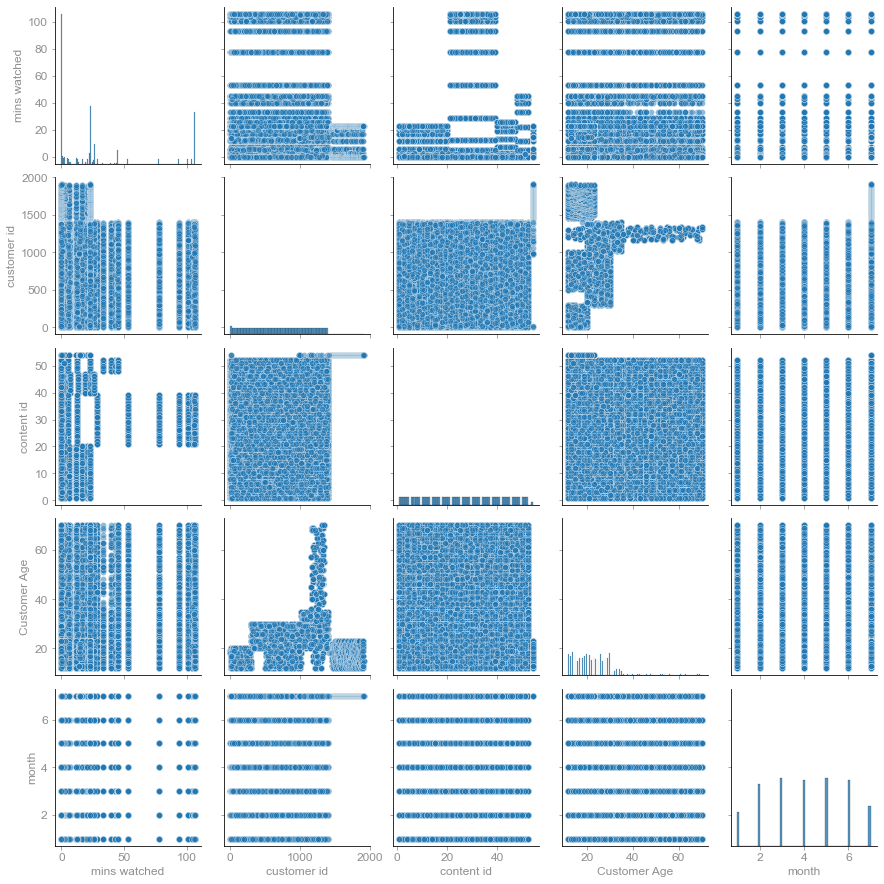

In [243]:
g = sns.pairplot(df,vars=['mins watched','customer id','content id','Customer Age','month'],kind='scatter',diag_kind='hist', plot_kws={'alpha':0.5})

First of all, I'm going to start off the presentation with an overview of one of the most important metrics in viewership. Total watch time. I'm going to start off at a high level and show the total watch time of all users for each country for the entire dataset. This will give us an idea of where the main markets are. 

## High Level Overview of Global Market Share of Watch Time

In [244]:
country_total = df.groupby('country').sum().reset_index()[['country','mins watched']]

In [245]:
country_total

,country,mins watched
0,Australia,7.101693e+04
1,Canada,1.553256e+05
2,Chile,7.560338e+04
3,Colombia,4.436108e+04
4,Costa Rica,3.760998e+04
5,Denmark,3.029889e+04
6,Dominican Republic,1.623069e+04
7,Ecuador,3.850879e+04
8,El Salvador,4.213311e+04
9,Finland,4.584948e+04


In [246]:
country_total['region'] = ['Oceania','North America','South America','South America','Central America','Europe','Central America','South America','Central America','Europe','Europe','Central America','Asia','North America','Oceania','Europe','South America','Asia','Central America','Asia','Europe','Central America','Middle East','Europe','North America']

In [247]:
def region_color(x):
    if x == 'North America':
        y = 'red'
    elif x == 'Oceania':
        y = 'orange'
    elif x == 'Asia':
        y = 'blue'
    elif x == 'Middle East':
        y = 'magenta'
    elif x == 'Central America':
        y = 'cyan'
    elif x == 'South America':
        y = 'green'
    elif x == 'Europe':
        y = 'yellow'
    return y

In [248]:
country_total['color'] = country_total['region'].apply(region_color)

In [249]:
country_total

,country,mins watched,region,color
0,Australia,7.101693e+04,Oceania,orange
1,Canada,1.553256e+05,North America,red
2,Chile,7.560338e+04,South America,green
3,Colombia,4.436108e+04,South America,green
4,Costa Rica,3.760998e+04,Central America,cyan
5,Denmark,3.029889e+04,Europe,yellow
6,Dominican Republic,1.623069e+04,Central America,cyan
7,Ecuador,3.850879e+04,South America,green
8,El Salvador,4.213311e+04,Central America,cyan
9,Finland,4.584948e+04,Europe,yellow


Now we have the data in the table above, but it is much easier to understand what the data is telling us if we can visualise it. The best way to showcase some share of various values is a treemap which I have included below. In the threemap I have color-coded the countries by their region for further insights.

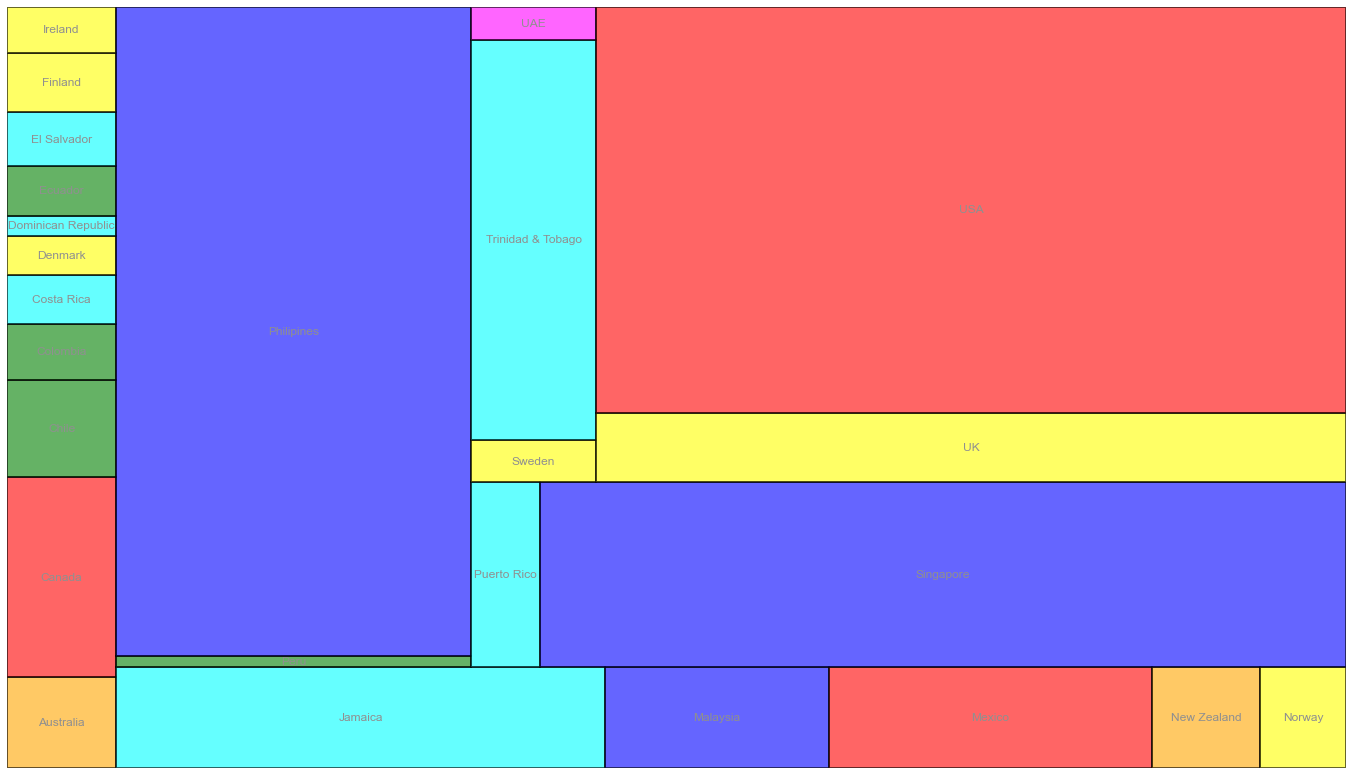

In [250]:
sizes=country_total['mins watched'].tolist()
label=country_total['country'].tolist()
color = country_total['color'].tolist()
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(24, 14)
squarify.plot(sizes=sizes, label=label, alpha=0.6,edgecolor="black", linewidth=2, color = color)
plt.axis('off')
plt.show()

Here we can see that the USA contributes the largest share of watch time, however countries such as the Philipines and Singapore also have sizeable contributions. 

Now that we know the biggest markets overall, it would now be helpful to see how the watch time changes over time.

In [251]:
country_over_time = df.groupby(['country','month']).sum().reset_index()[['country','month','mins watched']]

In [252]:
country_over_time

,country,month,mins watched
0,Australia,1,6266.508653
1,Australia,2,10012.004878
2,Australia,3,12709.976818
3,Australia,4,11589.125965
4,Australia,5,12673.265304
...,...,...,...
170,USA,3,371425.982629
171,USA,4,359639.821257
172,USA,5,372621.194946
173,USA,6,363820.999873


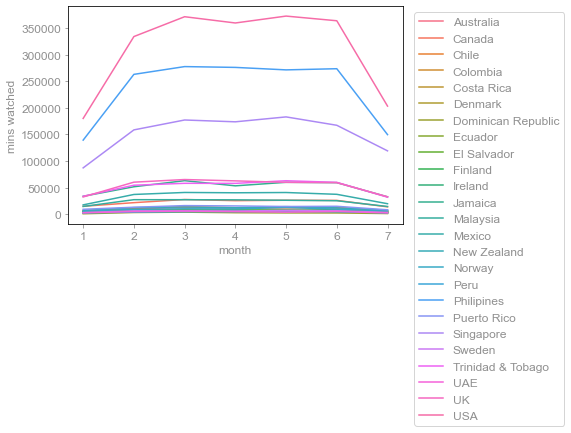

In [253]:
lp = sns.lineplot(x='month', y='mins watched', data=country_over_time, hue='country')
lp.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

Here it appears to be that January and July have less people watching shows on crunchyroll. However when we look at our data we can see that actually this is because we have started from the middle of Januray and only have data until mid July. Thus the lack of minutes watched stems for less data rather than a drop in viewership. To adjust for this we will divide each month by the number of days in the month to calculate the minutes watched per day in each country for each month.

In [254]:
days = pd.DataFrame(data={'month':[1,2,3,4,5,6,7],'days':[16,28,31,30,31,30,17]})

In [255]:
days

,month,days
0,1,16
1,2,28
2,3,31
3,4,30
4,5,31
5,6,30
6,7,17


In [256]:
country_over_time = pd.merge(country_over_time,days,on='month',how='inner')

In [257]:
country_over_time

,country,month,mins watched,days
0,Australia,1,6266.508653,16
1,Canada,1,14826.230410,16
2,Chile,1,6945.692591,16
3,Colombia,1,3168.246368,16
4,Costa Rica,1,3237.408707,16
...,...,...,...,...
170,Sweden,7,3324.844739,17
171,Trinidad & Tobago,7,31946.313303,17
172,UAE,7,2452.978964,17
173,UK,7,32720.949531,17


In [258]:
country_over_time['mins_watched_per_day'] = country_over_time['mins watched']/country_over_time['days']

In [259]:
country_over_time

,country,month,mins watched,days,mins_watched_per_day
0,Australia,1,6266.508653,16,391.656791
1,Canada,1,14826.230410,16,926.639401
2,Chile,1,6945.692591,16,434.105787
3,Colombia,1,3168.246368,16,198.015398
4,Costa Rica,1,3237.408707,16,202.338044
...,...,...,...,...,...
170,Sweden,7,3324.844739,17,195.579102
171,Trinidad & Tobago,7,31946.313303,17,1879.194900
172,UAE,7,2452.978964,17,144.292880
173,UK,7,32720.949531,17,1924.761737


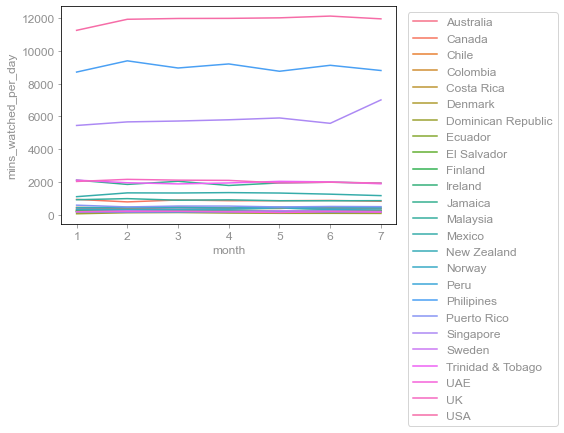

In [260]:
lp = sns.lineplot(x='month', y='mins_watched_per_day', data=country_over_time, hue='country')
lp.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

Here you can see a spike in viewership in Singapore in the latest month. You can see that the spike has occurred in the month of July and so coincided with the start of the summer 2021 season of anime. Therefore there could be something in particular about this season that has increased viewership. Lets look into this in more detail.

## Deep Dive into Singapore

First, lets take a look at some of the different demographic segments that make up the Singapore market such as customer age and genre of the show being watched. Then lets see if the relative share of those shows has changed over time - especially within the latest month of July corresponding to the spike in daily watch time.

In [261]:
sg = df[df.country == 'Singapore']

The function below is for bucketing the Ages into meaningful categories

In [263]:
def age_category(x):
    if x < 20:
        y = 'under 20'
    elif x < 30:
        y = '20s'
    elif x < 40:
        y = '30s'
    elif x < 50:
        y = '40s'
    elif x < 60:
        y = '50s'
    else:
        y = 'over 60'
    return y

In [264]:
sg['Age category'] = sg['Customer Age'].apply(age_category)

<ipython-input-264-687de7198559>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg['Age category'] = sg['Customer Age'].apply(age_category)


In [265]:
sg_age = sg.groupby(['month','Age category']).count().reset_index()[['month','Age category','transaction id']]

Here we have the number of separate instances of crunchyroll usage from users of different age categories for each month. We will then reformat into a form that we can use for a 100% stacked bar chart.

In [266]:
sg_age

,month,Age category,transaction id
0,1,20s,1438
1,1,30s,408
2,1,40s,68
3,1,50s,50
4,1,over 60,17
5,1,under 20,1116
6,2,20s,2702
7,2,30s,718
8,2,40s,108
9,2,50s,116


In [267]:
month_adjustment = sg_age.groupby('month').sum().reset_index()
sg_age = pd.merge(sg_age,month_adjustment,on='month',how='left')
sg_age['Count'] = sg_age['transaction id_x']/sg_age['transaction id_y']

In [268]:
sg_age = sg_age.pivot('month','Age category').reset_index()[['month','Count']]

In [269]:
sg_age

month     Count                                                  
Age category             20s       30s       40s       50s   over 60  under 20
0                1  0.464320  0.131740  0.021957  0.016145  0.005489  0.360349
1                2  0.482156  0.128123  0.019272  0.020700  0.006246  0.343505
2                3  0.482249  0.133993  0.020892  0.013038  0.005655  0.344172
3                4  0.490023  0.139685  0.015932  0.018024  0.003862  0.332475
4                5  0.479694  0.136520  0.024055  0.017651  0.003436  0.338644
5                6  0.482347  0.135090  0.017570  0.013592  0.004475  0.346925
6                7  0.425010  0.086601  0.011420  0.008184  0.002855  0.465931

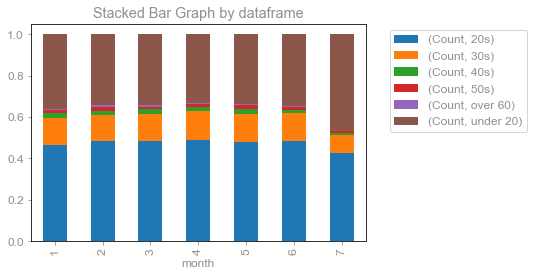

In [270]:
lp = sg_age.plot(x='month', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
lp.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

From this 100% stacked bar chart we can see that whilst most of the months keep the same proportion of viewership for each age bucket, there is a noticeable increase in the proportion of users under 20 in July coinciding with the spike in watch time. Note that the 100% stacked bar chart only shows proportions and not actual amounts, so further analysis would be need to confirm that this rise is indeed due to those under 20. 

We will now take a look at the genres that are users are watching over time.

In [271]:
sg_genre = sg.groupby(['month','genre']).count().reset_index()[['month','genre','transaction id']]

In [273]:
month_adjustment = sg_genre.groupby('month').sum().reset_index()
sg_genre = pd.merge(sg_genre,month_adjustment,on='month',how='left')

In [274]:
sg_genre['Count'] = sg_genre['transaction id_x']/sg_genre['transaction id_y']

In [275]:
sg_genre = sg_genre.pivot('month','genre').reset_index()[['month','Count']]

In [276]:
sg_genre

month     Count                                                    \
genre          action adventure    comedy    isekai     josei   romance   
0         1  0.125605  0.053277  0.053923  0.186309  0.064256  0.180174   
1         2  0.130264  0.055318  0.058351  0.178087  0.053712  0.176303   
2         3  0.137135  0.058278  0.057022  0.179548  0.061734  0.165410   
3         4  0.129707  0.062601  0.061474  0.176054  0.056485  0.172675   
4         5  0.133864  0.055451  0.060918  0.179475  0.057013  0.170259   
5         6  0.140229  0.059838  0.063484  0.170396  0.058843  0.160782   
6         7  0.084317  0.043776  0.039399  0.469928  0.036353  0.102018   

                                                   
genre    seinen     shojo    shonen slice of life  
0      0.059735  0.054892  0.165644      0.056183  
1      0.056924  0.054425  0.173269      0.063348  
2      0.054665  0.059692  0.166352      0.060163  
3      0.054393  0.060348  0.173640      0.052623  
4      0.059356  0.054202  0.169634      0.059825  
5      0.056191  0.054036  0.178684      0.057517  
6      0.036163  0.039208  0.112486      0.036353

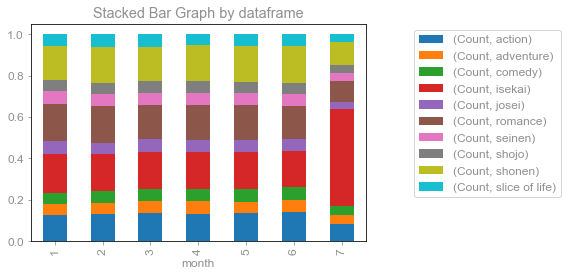

In [277]:
lp = sg_genre.plot(x='month', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
lp.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

Here we can also see a large increase in isekais being watched compared to other kinds of shows in July. Now this could be because of one isekai show in particular or by several so lets explore this further.

Here we will explore the watch time of the different shows being wacthed in July in Singapore. We will create a treemap showing the total watch time for each show, color coded by their genre.

In [278]:
sg_july = sg[sg.month == 7]

In [280]:
sg_july_genre = sg_july.groupby(['content id','genre']).sum().reset_index()[['content id','genre','mins watched']]

In [282]:
color_map = pd.DataFrame(data = {'genre':['shonen','seinen','shojo','josei','romance','isekai','action','adventure','slice of life','comedy'],'color':['red','black','yellow','purple','pink','blue','brown','green','grey','orange']})

In [283]:
color_map

,genre,color
0,shonen,red
1,seinen,black
2,shojo,yellow
3,josei,purple
4,romance,pink
5,isekai,blue
6,action,brown
7,adventure,green
8,slice of life,grey
9,comedy,orange


In [284]:
sg_july_genre = pd.merge(sg_july_genre,color_map,on='genre',how='left')

In [285]:
sg_july_genre

,content id,genre,mins watched,color
0,1,shonen,691.807426,red
1,2,shojo,500.457111,yellow
2,3,seinen,754.367852,black
3,4,josei,794.708951,purple
4,5,isekai,649.317956,blue
5,6,romance,633.864615,pink
6,7,action,824.349549,brown
7,8,adventure,915.788024,green
8,9,comedy,696.962145,orange
9,10,slice of life,644.582268,grey


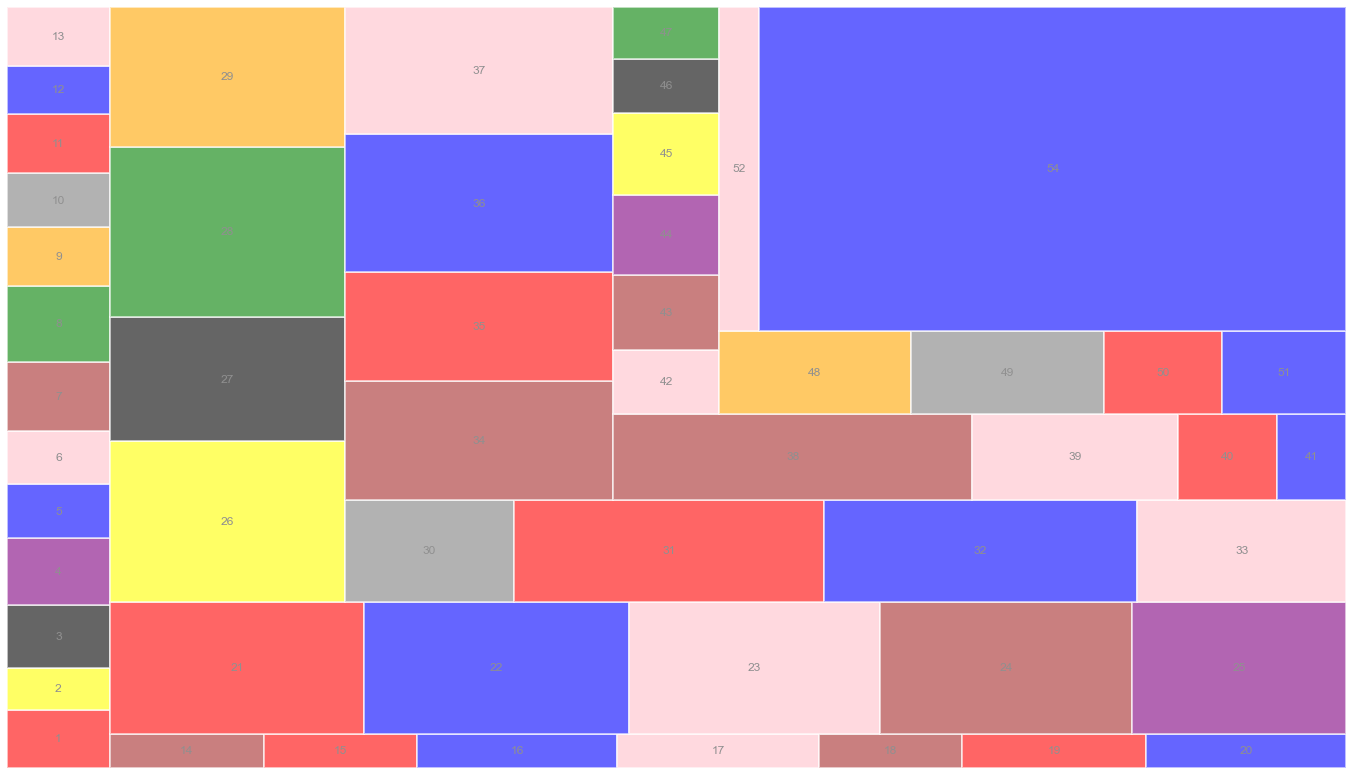

In [286]:
sizes=sg_july_genre['mins watched'].tolist()
label=sg_july_genre['content id'].tolist()
genre = sg_july_genre['color'].tolist()
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(24, 14)
colors = ['b','g','r','c','m','b','g','r','c','m','b','g','r','c','m','b','g','r','c','m','tab:blue','g','r','mediumblue','red']
squarify.plot(sizes=sizes, label=label, alpha=0.6,edgecolor="white", linewidth=2, color=genre)
plt.axis('off')
plt.show()

Here we can see that the isekai show with content id 54 takes up a significant share of the watch time in Singapore in July. This is most likely the cause of the increase of the proportion of isekai being wacthed.

In [287]:
# content id 54 in Singapore over time

In [288]:
sg_id54 = sg[sg['content id'] == 54]

In [289]:
sg_id54 = sg_id54.groupby('month').sum().reset_index()[['month','mins watched']]

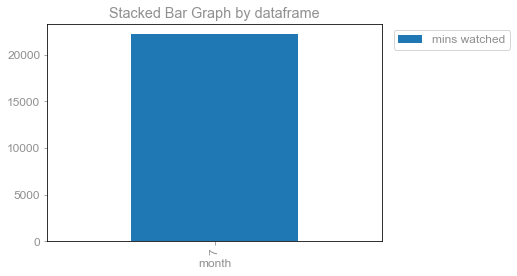

In [290]:
lp = sg_id54.plot(x='month', kind='bar',
        title='Stacked Bar Graph by dataframe')
lp.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

Here you can see that the new show with id 54 has no viewings prior to July. Thus it is likely that this show is a new seasonal show that has only begun airing in the summer 2021 anime season. In fact, when we look up the name of the show it corresponds to "That Time I Got Reincarnated as a Slime Season 2 Part 2" 

You can find the link to it on my anime list below:

https://myanimelist.net/anime/41487/Tensei_shitara_Slime_Datta_Ken_2nd_Season_Part_2

Now is this show also responsible for the increase in younger viewers?

## Deep Dive into That Time I got Reincarnated as a Slime

In [291]:
sg_show = sg[sg['content id'] == 54]

In [292]:
sg_show_ages = sg_show.groupby('Age category').count().reset_index()[['Age category','transaction id']]
# bucket the ages

In [293]:
sg_show_ages

,Age category,transaction id
0,20s,585
1,under 20,1314


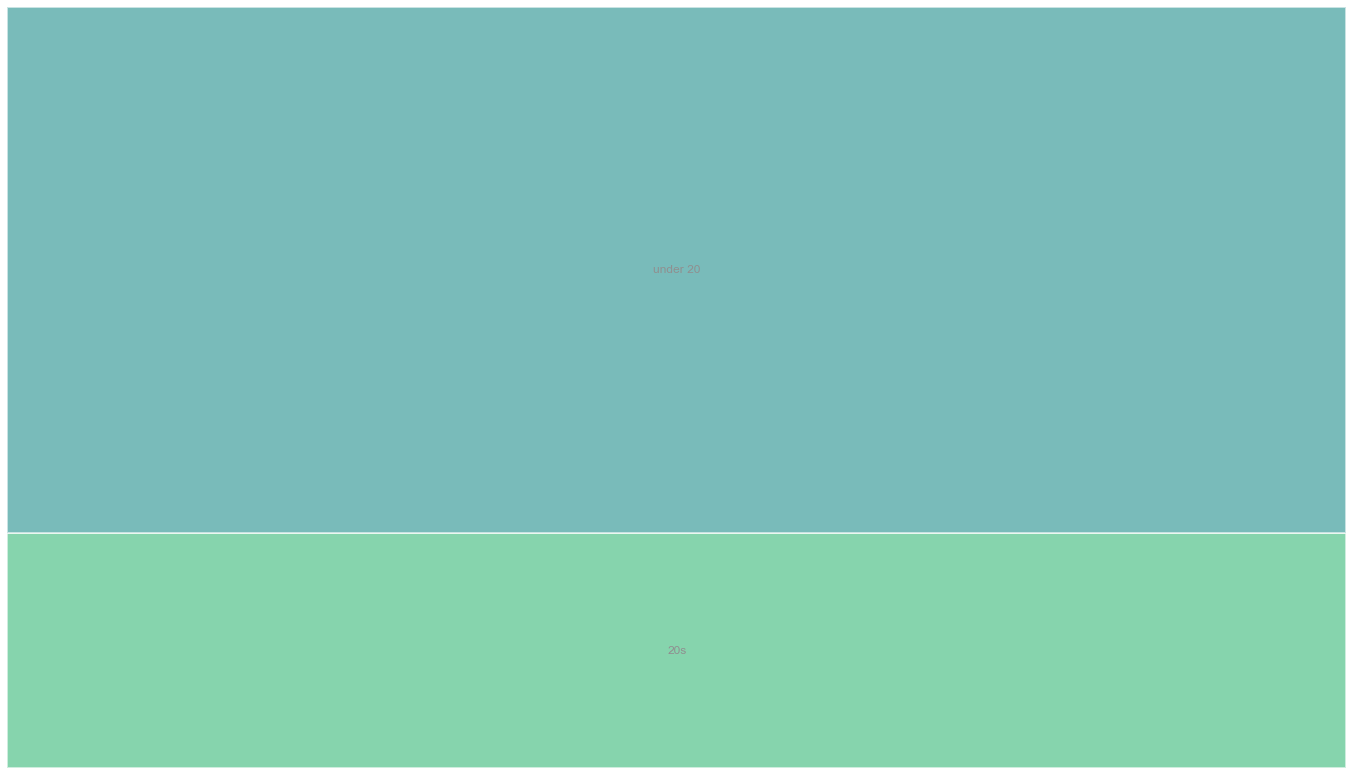

In [294]:
sizes=sg_show_ages['transaction id'].tolist()
label=sg_show_ages['Age category'].tolist()
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(24, 14)
squarify.plot(sizes=sizes, label=label, alpha=0.6,edgecolor="white", linewidth=2)
plt.axis('off')
plt.show()

here we can see that the majority of this show's viewers are indeed under the age of 20 and all viewership are under 30. However to see if this show caused a rise in young viewers, we can look at the watch times of younger viewers in Singapore over time.

In [295]:
sg_young = sg[sg['Age category']=='under 20']

In [296]:
def slime(x):
    if x == 54:
        y = 'slime'
    else:
        y = 'not slime'
    return y

In [297]:
sg_young['slime'] = sg_young['content id'].apply(slime)

<ipython-input-297-973ac6da8c59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_young['slime'] = sg_young['content id'].apply(slime)


In [298]:
sg_young

,transaction id,customer id,content id,show length,mins watched,country,device id/type,Date,show completed (watch to the end of episode),proportion watched,episode No watched / episode ID,genre,Customer Age,month,gender,Age category,slime
20,21,703,46,26,25.996792,Singapore,NaN,2021-01-16,1,9.975274e-01,NaN,seinen,13,1,male,under 20,not slime
82,83,839,46,26,25.991281,Singapore,NaN,2021-01-16,1,9.525741e-01,NaN,seinen,12,1,male,under 20,not slime
87,88,629,19,23,0.056870,Singapore,NaN,2021-01-16,0,8.315280e-07,NaN,shonen,19,1,male,under 20,not slime
101,102,691,16,23,0.413683,Singapore,NaN,2021-01-16,1,9.996646e-01,NaN,isekai,12,1,male,under 20,not slime
103,104,903,6,23,22.999981,Singapore,NaN,2021-01-16,0,1.798621e-02,NaN,romance,12,1,male,under 20,not slime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262493,262486,978,54,23,14.183438,Singapore,NaN,2021-07-13,0,6.166712e-01,NaN,isekai,19,7,female,under 20,slime
262494,262486,979,54,23,14.219845,Singapore,NaN,2021-07-13,0,6.182541e-01,NaN,isekai,19,7,female,under 20,slime
262496,262486,999,54,23,14.292660,Singapore,NaN,2021-07-13,0,6.214200e-01,NaN,isekai,13,7,female,under 20,slime
262505,262486,1315,54,23,14.620327,Singapore,NaN,2021-07-13,0,6.356664e-01,NaN,isekai,16,7,female,under 20,slime


In [299]:
sg_young_slime = sg_young.groupby(['month','slime']).sum().reset_index()[['month','slime','mins watched']]

In [300]:
sg_young_slime

,month,slime,mins watched
0,1,not slime,32316.397703
1,2,not slime,52570.863604
2,3,not slime,60723.856956
3,4,not slime,56947.743423
4,5,not slime,62020.649015
5,6,not slime,58095.150045
6,7,not slime,33775.966867
7,7,slime,15121.911543


here we see that the watch time is again affected by the number of days in our data. Thus we will divide by the number of days of data in each month to get the watch time per day for each month

In [301]:
sg_young_slime['days'] = [16,28,31,30,31,30,17,17]

In [302]:
sg_young_slime['minutes watched per day'] = sg_young_slime['mins watched']/sg_young_slime['days']

In [303]:
sg_young_slime = sg_young_slime[['month','slime','minutes watched per day']]

In [304]:
sg_young_slime = sg_young_slime.pivot('month','slime').reset_index()[['month','minutes watched per day']]

In [305]:
sg_young_slime = sg_young_slime.fillna(0)

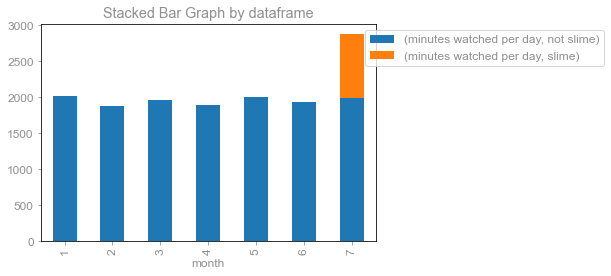

In [306]:
lp = sg_young_slime.plot(x='month', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
lp.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.show()

Here you can see that the slime show is in fact responsible for the increase in younger viewer watch time in Singapore as the watch time that isn't slime stays roughly constant. 

It would also be interesting to see if these users are new users who have come onto the platform specifically for this show, or if they are prexisting users.

In [310]:
sg_new = sg.groupby('customer id').min().reset_index()[['customer id','month']]

For each customer in Singapore I have taken their minimum/earliest date that they have used the platform to watch a show. Thus if their minimum is in July then I will classify them as a new user.

In [312]:
def new_user(x):
    if x == 7:
        y = 'new user'
    else:
        y = 'pre-existing user'
    return y

In [313]:
sg_new['user status'] = sg_new['month'].apply(new_user)

In [314]:
sg_new

,customer id,month,user status
0,7,1,pre-existing user
1,8,1,pre-existing user
2,15,1,pre-existing user
3,17,1,pre-existing user
4,35,1,pre-existing user
...,...,...,...
650,1904,7,new user
651,1905,7,new user
652,1906,7,new user
653,1907,7,new user


In [315]:
# Creating a distinct list of customers who have watched "That Time I Got Reincarnated as a Slime Season 2 Part 2"
sg_slime = list(set(sg[sg['content id'] == 54]['customer id']))

In [316]:
sg_slime = pd.DataFrame({'customer id':sg_slime})

In [317]:
sg_slime

,customer id
0,7
1,8
2,15
3,978
4,979
...,...
468,1904
469,1905
470,1906
471,1907


Now we can join these two dataframes to get the distinct list of customers who have wacthed slime along with their new/pre-existing status

In [318]:
sg_new = pd.merge(sg_new,sg_slime,on='customer id',how='right')
sg_new = sg_new.rename(columns = {'customer id':'Count'})

In [319]:
sg_new = sg_new.groupby('user status').count().reset_index()[['user status','Count']]

In [320]:
sg_new

,user status,Count
0,new user,456
1,pre-existing user,17


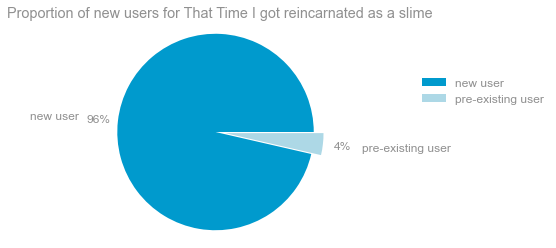

In [321]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
labels = ['new user','pre-existing user']
count = list(sg_new.Count)
explode=(0.1,0)
ax.pie(count, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Proportion of new users for That Time I got reincarnated as a slime")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

Now we will use a pair plot to see if we can uncover any other features from this dataset surrounding the slime show.

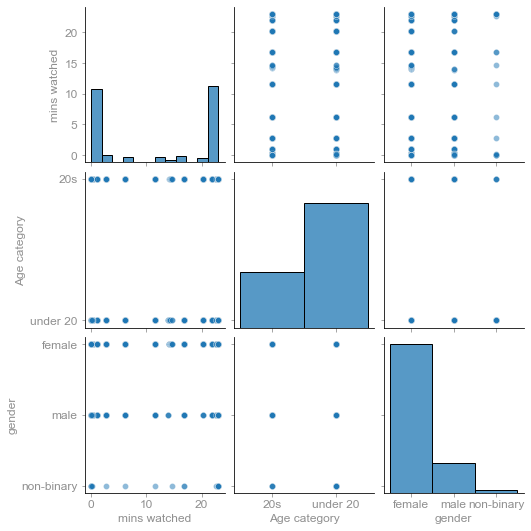

In [322]:
g = sns.pairplot(sg_show,vars=['mins watched','Age category','gender'],kind='scatter',diag_kind='hist',plot_kws={'alpha':0.5})

Here we can see that for the slime show as well as its audience being mostly under the age of 20, it has a large female audience too. 

## Conclusion

From this analysis we can conclude that the spike in viewership in Singapore is most likely caused by the release of the latest season of "That Time I Got Reincarnated as a Slime" and that the majority of its audience are users under the age of 20 and female viewers. Thus the Business Intelligence team could help advise the marketing team to target females under 20 in Singapore. Furthermore, we have identified that the majority of the users who are watching the show are in fact new users, and so perhaps directing the marketing to outside platforms on social media used by under 20s e.g. tik tok, instagram, twitter, etc. may provide the best return on investment. 

Overall, this is just a brief glimpse of the deep dive analysis that can be done on viewership data. I would also love the opportunity to explore real datasets and provide real insights into the anime industry as I'm sure there will be much more complex and interesting patterns that can be uncovered. Furthermore, there are a host of machine learning techniques that I would love to user to drive insights such as user segmentation algorithms or even trend analysis using natural language processing on social media data. 